In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae
import holidays
import calendar
from datetime import datetime

In [3]:
df = pd.read_csv('ola.csv')

In [4]:
print(df.head())
print("Dataset shape:", df.shape)

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
Dataset shape: (10886, 12)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


In [6]:
df['date'] = pd.to_datetime(df['datetime']).dt.date
df['time'] = pd.to_datetime(df['datetime']).dt.hour

In [7]:
df['day'] = pd.to_datetime(df['date']).dt.day
df['month'] = pd.to_datetime(df['date']).dt.month
df['year'] = pd.to_datetime(df['date']).dt.year

In [9]:
def weekend_or_weekday(date):
    return 1 if date.weekday() < 5 else 0
    df['weekday'] = df['date'].apply(lambda x: weekend_or_weekday(pd.to_datetime(x)))

In [10]:
df['am_or_pm'] = df['time'].apply(lambda x: 1 if x > 11 else 0)


In [11]:
def is_holiday(date):
    india_holidays = holidays.country_holidays('IN')
    return 1 if date in india_holidays else 0

df['holiday'] = df['date'].apply(is_holiday)

In [12]:
df.drop(['datetime', 'date'], axis=1, inplace=True)


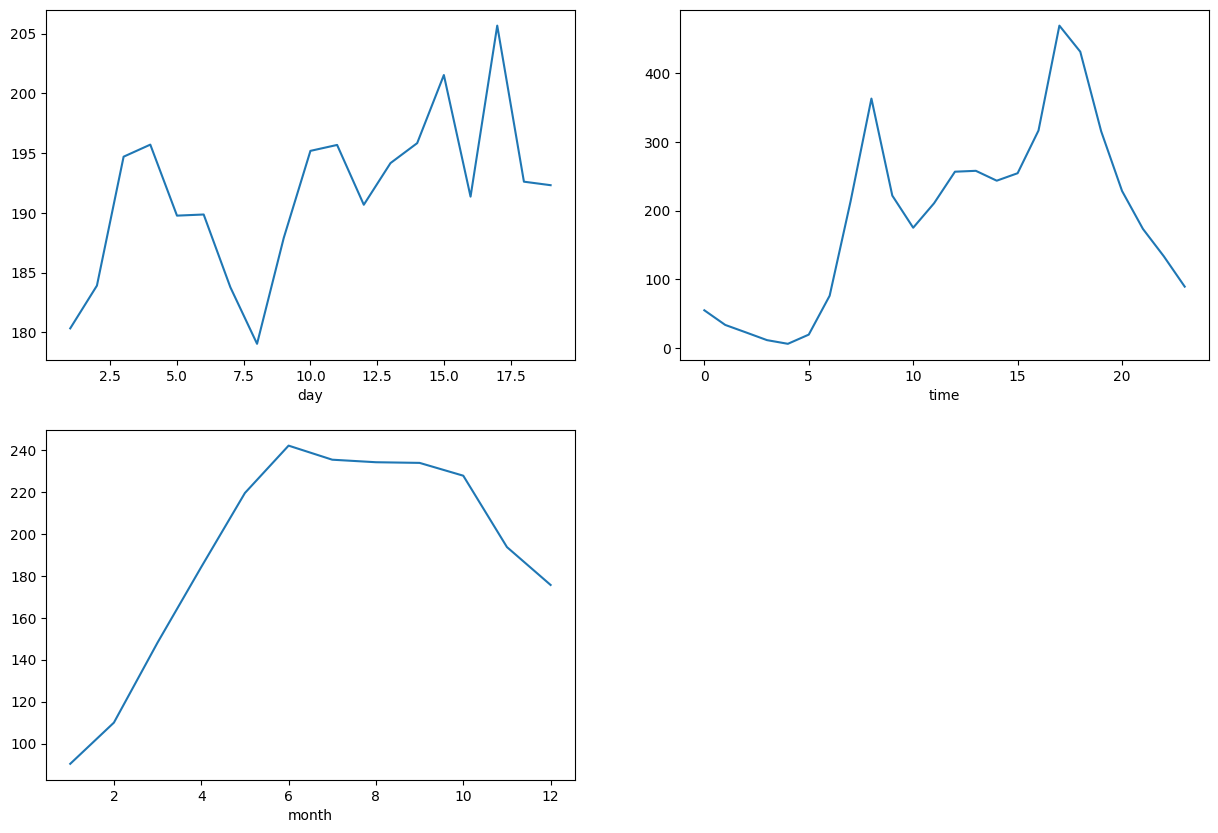

In [13]:
plt.figure(figsize=(15, 10))
features = ['day', 'time', 'month']
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col).mean()['count'].plot()
plt.show()

KeyError: 'weekday'

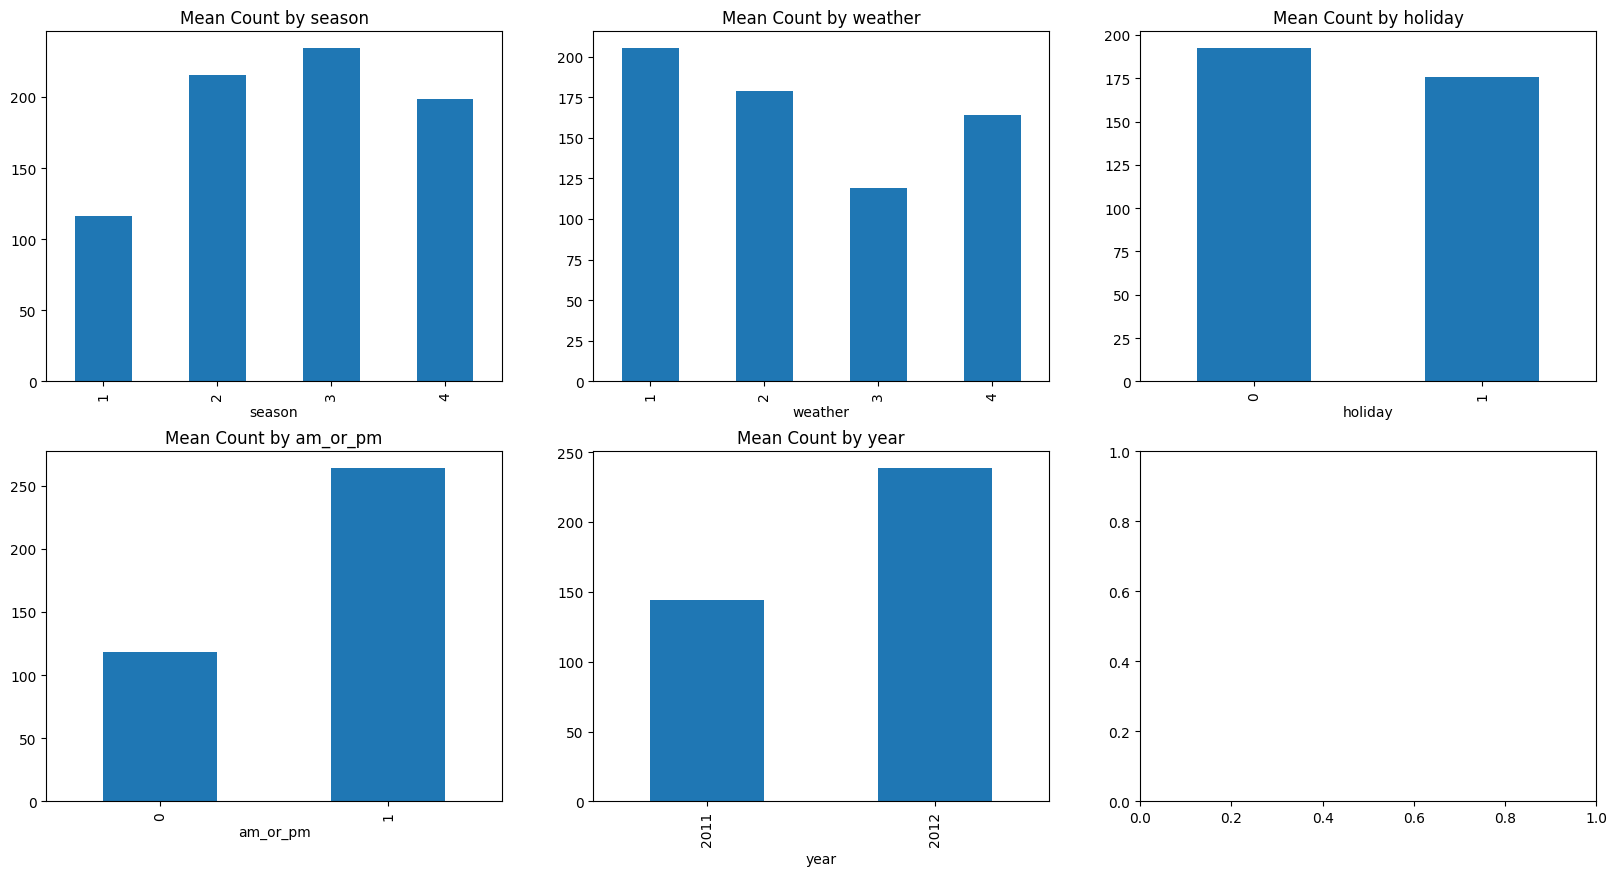

In [20]:
plt.figure(figsize=(20, 10))

features = ['season', 'weather', 'holiday', 'am_or_pm', 'year', 'weekday']

for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns
    df.groupby(col).mean()['count'].plot.bar()
    plt.title(f'Mean Count by {col}')  # Add a title for each subplot

plt.tight_layout()

plt.show()


<ipython-input-21-763c62c657d1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['temp'])
<ipython-input-21-763c62c657d1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['windspeed'])


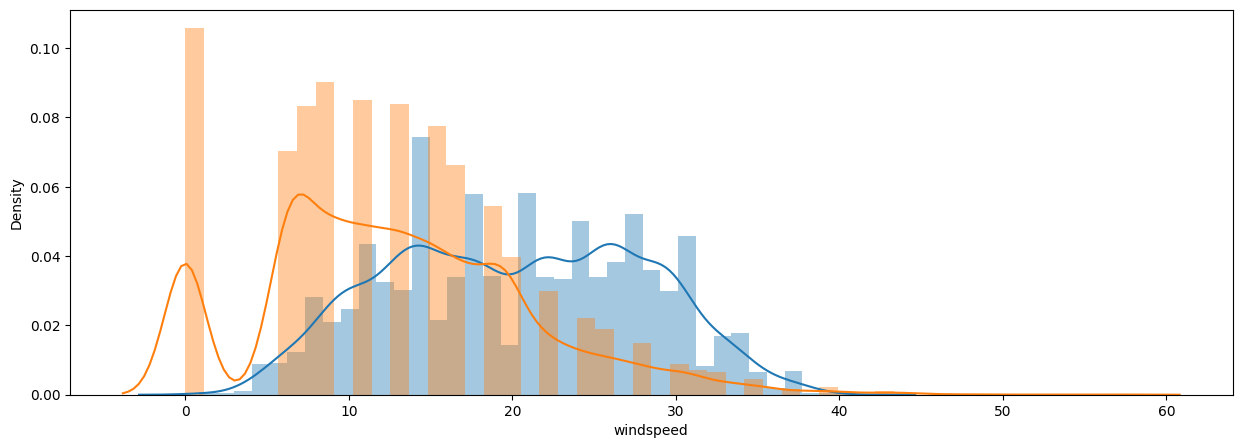

In [21]:
plt.figure(figsize=(15, 5))
sb.distplot(df['temp'])
sb.distplot(df['windspeed'])
plt.show()

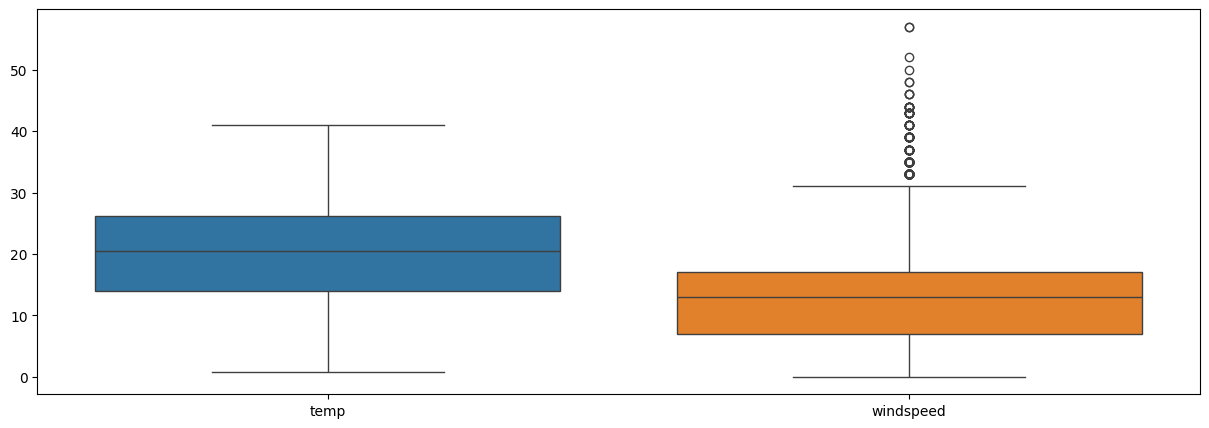

In [22]:
plt.figure(figsize=(15, 5))
sb.boxplot(data=df[['temp', 'windspeed']])
plt.show()

In [23]:
df = df[(df['windspeed'] < 32) & (df['humidity'] > 0)]


In [24]:
df.drop(['registered', 'time'], axis=1, inplace=True)


<ipython-input-24-a664079f59bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['registered', 'time'], axis=1, inplace=True)


In [25]:
features = df.drop(['count'], axis=1)
target = df['count'].values

In [26]:
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.1, random_state=22)


In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [28]:
models = {
    "Linear Regression": LinearRegression(),
    "XGBoost Regressor": XGBRegressor(),
    "Lasso Regression": Lasso(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Ridge Regression": Ridge()
}

for name, model in models.items():
    model.fit(X_train, Y_train)

    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    print(f'{name}:')
    print('Training Error:', mae(Y_train, train_preds))
    print('Validation Error:', mae(Y_val, val_preds))
    print()

Linear Regression:
Training Error: 81.91277015229116
Validation Error: 82.32337850304785

XGBoost Regressor:
Training Error: 37.6232256441966
Validation Error: 61.00627515042075

Lasso Regression:
Training Error: 81.58356161926133
Validation Error: 81.95301155332089

Random Forest Regressor:
Training Error: 22.36470843194245
Validation Error: 60.07936856277598

Ridge Regression:
Training Error: 81.91105236272216
Validation Error: 82.32202467410288

